In [3]:
# Librerias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# RNC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [4]:
train = ('/content/drive/MyDrive/Colab Notebooks/coding dojo/PTUnsuperML/fashion data/fashion-mnist_train.csv')
test = ('/content/drive/MyDrive/Colab Notebooks/coding dojo/PTUnsuperML/fashion data/fashion-mnist_test.csv')
train_df = pd.read_csv(train, delimiter=",")
test_df = pd.read_csv(test, delimiter=",")

In [5]:
# Reescalamos data entre 0 y 1
# 
X_train = train_df.drop(columns = 'label')/255
X_test = test_df.drop(columns = 'label')/255
y_train = train_df['label']
y_test = test_df['label']

In [6]:
# Split del dataset 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 111)
X_train.shape

(48000, 784)

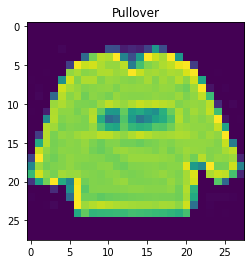

In [7]:
# Revisamos imagenes
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
               5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

plt.imshow(np.array(X_train.loc[0, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[0]]));

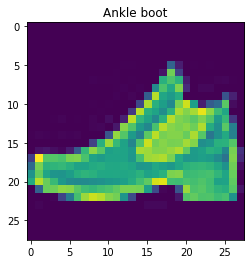

In [8]:
plt.imshow(np.array(X_train.loc[1, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[1]]));

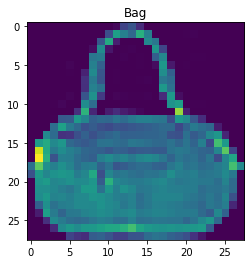

In [9]:
plt.imshow(np.array(X_train.loc[20, :]).reshape(28, 28))
plt.title('{}'.format(class_names[y_train[20]]));

In [10]:
# Ensamblamos la data
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_val = np.array(X_val).reshape(X_val.shape[0], 28, 28, 1)
# Convertimos el objetivo a categorico
y_train = to_categorical(y_train, num_classes = 10)
y_val = to_categorical(y_val, num_classes = 10)
# Step 1: Define our network structure
# Save the input shape
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [11]:
# Modelo secuencial
model = Sequential()
# Capa convucional 
model.add(Conv2D(filters = 32, # Filtros
                 kernel_size = 3, # tamaño del filtro
                 activation = 'relu',
                 input_shape = input_shape)) # Tamaño del set de datos
# Capa de muestra
model.add(MaxPooling2D(pool_size = 2)) # tamaño de muestra
Dropout(0.2)
# Capa flat
model.add(Flatten())
# Capa salida
model.add(Dense(10, # Posibles resultados
                activation = 'softmax')) # Funciones de activacion

In [12]:
# Step 2: Compilamos
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [14]:
# Paso 3: Encajamos al modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val), 
                    batch_size = 4096,
                    epochs=61)

Epoch 1/61
12/12 [==============================] - 23s 2s/step - loss: 0.4707 - acc: 0.8396 - val_loss: 0.4710 - val_acc: 0.8378
Epoch 2/61
12/12 [==============================] - 15s 1s/step - loss: 0.4509 - acc: 0.8466 - val_loss: 0.4552 - val_acc: 0.8418
Epoch 3/61
12/12 [==============================] - 14s 1s/step - loss: 0.4355 - acc: 0.8515 - val_loss: 0.4430 - val_acc: 0.8453
Epoch 4/61
12/12 [==============================] - 15s 1s/step - loss: 0.4227 - acc: 0.8554 - val_loss: 0.4304 - val_acc: 0.8500
Epoch 5/61
12/12 [==============================] - 15s 1s/step - loss: 0.4110 - acc: 0.8597 - val_loss: 0.4216 - val_acc: 0.8535
Epoch 6/61
12/12 [==============================] - 15s 1s/step - loss: 0.4018 - acc: 0.8634 - val_loss: 0.4127 - val_acc: 0.8571
Epoch 7/61
12/12 [==============================] - 15s 1s/step - loss: 0.3933 - acc: 0.8654 - val_loss: 0.4067 - val_acc: 0.8602
Epoch 8/61
12/12 [==============================] - 15s 1s/step - loss: 0.3853 - acc: 0.86

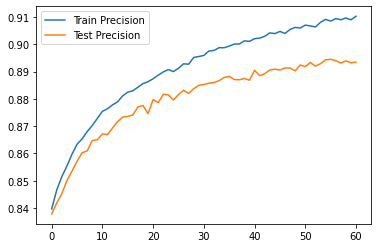

In [16]:
# Visualizamos precision
plt.plot(history.history['acc'], label='Train Precision')
plt.plot(history.history['val_acc'], label='Test Precision')
plt.legend();

In [17]:
# Predicciones
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)
preds = np.argmax(model.predict(X_test), axis=-1)

In [18]:
# Precision en entrenamiento
accuracy_score(y_test, preds)

0.9011